Train specified model.

LSTM model architecture and design inspired by [Alcantara et al.](https://peerj.com/articles/12752)

# Input parameters here

In [1]:
# # PARAMETERS # # 
BASE_DIR = '/content/drive/My Drive/CS230_FinalReport/' # your base directory
EXP_TYPE = 'with_physicsinputs'

# Hyperparameters:
LSTM_NODES = 64
DROPOUT_RATE = 0.5
LEARNING_RATE = 0.01
GRAD_LOSS_ALPHA = 0.4

MASK_VALUE = 999.
MAX_TIMESTEPS = 67
if EXP_TYPE == 'with_physicsinputs': NUM_INPUT_FEATS = 42
if EXP_TYPE == 'without_physicsinputs': NUM_INPUT_FEATS = 34
NUM_OUTPUT_FEATS = 2
MODEL_FILENAME = '/content/drive/My Drive/CS230_FinalReport/models/' + EXP_TYPE + '_lstm_stepclass' # where you want to save the model to
BATCH_SIZE = 32
EPOCHS = 100

SEED = 43
# # # # # # # # # # 

# Load libraries and data

In [2]:
# Mount Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Library imports
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as sio
import numpy as np
import os

# To import own model modules
import sys
sys.path.insert(0, (os.path.join(BASE_DIR, 'src/models')))
from train_model_utils_lstm_class import *

In [4]:
# Set the random seed
keras.utils.set_random_seed(SEED)

In [5]:
# Load in train, dev, arrays.
datadir = os.path.join(BASE_DIR, 'data', 'processed', 'normalized')

X_train = np.load(file=os.path.join(datadir, EXP_TYPE, 'X_train_norm.npy'), allow_pickle=True)
Y_train = np.load(file=os.path.join(datadir, EXP_TYPE, 'Y_train_stepclass.npy'), allow_pickle=True)
X_dev = np.load(file=os.path.join(datadir, EXP_TYPE, 'X_dev_norm.npy'), allow_pickle=True)
Y_dev = np.load(file=os.path.join(datadir, EXP_TYPE, 'Y_dev_stepclass.npy'), allow_pickle=True)

# Check sizes
print(f"X_train len: {X_train.shape[0]}")
print(f"X_dev len: {X_dev.shape[0]}")

X_train len: 5949
X_dev len: 820


# Train the model

In [6]:
# Call build model with selected parameters.

model = build_model(
    NUM_TIMESTEPS = MAX_TIMESTEPS,
    NUM_INPUT_FEATS = NUM_INPUT_FEATS,
    NUM_OUTPUT_FEATS = NUM_OUTPUT_FEATS,
    MASK_VALUE = MASK_VALUE,
    lstm_nodes = 512,
    lstm_act = 'tanh',
    dropout_rate = DROPOUT_RATE,
    dense_act = 'sigmoid',
    learning_rate = LEARNING_RATE
    )

# Print a summary of the model's layers and all the parameters.
model.summary()

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 67, 42)]          0         
                                                                 
 masking (Masking)           (None, 67, 42)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 67, 512)          2273280   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 67, 512)           0         
                                                                 
 dense (Dense)               (None, 67, 2)             1026      
                                                                 
Total params: 2,274,306
Trainable params: 2,274,306
Non-trainable params: 0
____________________________________________________

In [7]:
# Train the model, and get the fit history.

fit_history = train_model(model,
                          MODEL_FILENAME,
                          X_train, Y_train,
                          X_dev, Y_dev,
                          use_earlystopping = False,
                          shuffle = True,
                          epochs = EPOCHS,
                          batch_size = BATCH_SIZE)

# Save fit history.
np.save(os.path.join(MODEL_FILENAME, 'fit_history.npy'), fit_history.history)

Epoch 1/100


186/186 [==============================] - ETA: 0s - loss: 0.0440 - binary_accuracy: 0.9835
Epoch 1: val_loss improved from inf to 0.08115, saving model to /content/drive/My Drive/CS230_FinalReport/models/with_physicsinputs_lstm_stepclass


186/186 [==============================] - 42s 193ms/step - loss: 0.0440 - binary_accuracy: 0.9835 - val_loss: 0.0812 - val_binary_accuracy: 0.9805
Epoch 2/100
186/186 [==============================] - ETA: 0s - loss: 0.0180 - binary_accuracy: 0.9930
Epoch 2: val_loss did not improve from 0.08115
186/186 [==============================] - 16s 86ms/step - loss: 0.0180 - binary_accuracy: 0.9930 - val_loss: 0.0975 - val_binary_accuracy: 0.9753
Epoch 3/100
186/186 [==============================] - ETA: 0s - loss: 0.0161 - binary_accuracy: 0.9938
Epoch 3: val_loss improved from 0.08115 to 0.07631, saving model to /content/drive/My Drive/CS230_FinalReport/models/with_physicsinputs_lstm_stepclass


186/186 [==============================] - 33s 177ms/step - loss: 0.0161 - binary_accuracy: 0.9938 - val_loss: 0.0763 - val_binary_accuracy: 0.9804
Epoch 4/100
186/186 [==============================] - ETA: 0s - loss: 0.0137 - binary_accuracy: 0.9944
Epoch 4: val_loss improved from 0.07631 to 0.06429, saving model to /content/drive/My Drive/CS230_FinalReport/models/with_physicsinputs_lstm_stepclass


186/186 [==============================] - 35s 190ms/step - loss: 0.0137 - binary_accuracy: 0.9944 - val_loss: 0.0643 - val_binary_accuracy: 0.9809
Epoch 5/100
186/186 [==============================] - ETA: 0s - loss: 0.0119 - binary_accuracy: 0.9952
Epoch 5: val_loss improved from 0.06429 to 0.05400, saving model to /content/drive/My Drive/CS230_FinalReport/models/with_physicsinputs_lstm_stepclass


186/186 [==============================] - 33s 179ms/step - loss: 0.0119 - binary_accuracy: 0.9952 - val_loss: 0.0540 - val_binary_accuracy: 0.9836
Epoch 6/100
186/186 [==============================] - ETA: 0s - loss: 0.0113 - binary_accuracy: 0.9954
Epoch 6: val_loss did not improve from 0.05400
186/186 [==============================] - 16s 87ms/step - loss: 0.0113 - binary_accuracy: 0.9954 - val_loss: 0.0608 - val_binary_accuracy: 0.9817
Epoch 7/100
186/186 [==============================] - ETA: 0s - loss: 0.0108 - binary_accuracy: 0.9957
Epoch 7: val_loss did not improve from 0.05400
186/186 [==============================] - 16s 85ms/step - loss: 0.0108 - binary_accuracy: 0.9957 - val_loss: 0.0584 - val_binary_accuracy: 0.9822
Epoch 8/100
186/186 [==============================] - ETA: 0s - loss: 0.0105 - binary_accuracy: 0.9959
Epoch 8: val_loss improved from 0.05400 to 0.05191, saving model to /content/drive/My Drive/CS230_FinalReport/models/with_physicsinputs_lstm_stepclass


186/186 [==============================] - 33s 180ms/step - loss: 0.0105 - binary_accuracy: 0.9959 - val_loss: 0.0519 - val_binary_accuracy: 0.9834
Epoch 9/100
186/186 [==============================] - ETA: 0s - loss: 0.0102 - binary_accuracy: 0.9959
Epoch 9: val_loss improved from 0.05191 to 0.04972, saving model to /content/drive/My Drive/CS230_FinalReport/models/with_physicsinputs_lstm_stepclass


186/186 [==============================] - 33s 179ms/step - loss: 0.0102 - binary_accuracy: 0.9959 - val_loss: 0.0497 - val_binary_accuracy: 0.9840
Epoch 10/100
186/186 [==============================] - ETA: 0s - loss: 0.0104 - binary_accuracy: 0.9958
Epoch 10: val_loss did not improve from 0.04972
186/186 [==============================] - 16s 87ms/step - loss: 0.0104 - binary_accuracy: 0.9958 - val_loss: 0.0627 - val_binary_accuracy: 0.9815
Epoch 11/100
186/186 [==============================] - ETA: 0s - loss: 0.0102 - binary_accuracy: 0.9959
Epoch 11: val_loss did not improve from 0.04972
186/186 [==============================] - 16s 88ms/step - loss: 0.0102 - binary_accuracy: 0.9959 - val_loss: 0.0568 - val_binary_accuracy: 0.9821
Epoch 12/100
186/186 [==============================] - ETA: 0s - loss: 0.0098 - binary_accuracy: 0.9962
Epoch 12: val_loss did not improve from 0.04972
186/186 [==============================] - 16s 85ms/step - loss: 0.0098 - binary_accuracy: 0.9962 -

186/186 [==============================] - 34s 182ms/step - loss: 0.0080 - binary_accuracy: 0.9969 - val_loss: 0.0483 - val_binary_accuracy: 0.9858
Epoch 26/100
186/186 [==============================] - ETA: 0s - loss: 0.0077 - binary_accuracy: 0.9969
Epoch 26: val_loss did not improve from 0.04832
186/186 [==============================] - 16s 86ms/step - loss: 0.0077 - binary_accuracy: 0.9969 - val_loss: 0.0487 - val_binary_accuracy: 0.9851
Epoch 27/100
186/186 [==============================] - ETA: 0s - loss: 0.0078 - binary_accuracy: 0.9970
Epoch 27: val_loss did not improve from 0.04832
186/186 [==============================] - 17s 92ms/step - loss: 0.0078 - binary_accuracy: 0.9970 - val_loss: 0.0692 - val_binary_accuracy: 0.9819
Epoch 28/100
186/186 [==============================] - ETA: 0s - loss: 0.0075 - binary_accuracy: 0.9970
Epoch 28: val_loss did not improve from 0.04832
186/186 [==============================] - 15s 83ms/step - loss: 0.0075 - binary_accuracy: 0.9970 -

186/186 [==============================] - 34s 185ms/step - loss: 0.0087 - binary_accuracy: 0.9969 - val_loss: 0.0382 - val_binary_accuracy: 0.9888
Epoch 42/100
186/186 [==============================] - ETA: 0s - loss: 0.0066 - binary_accuracy: 0.9975
Epoch 42: val_loss did not improve from 0.03818
186/186 [==============================] - 16s 85ms/step - loss: 0.0066 - binary_accuracy: 0.9975 - val_loss: 0.0436 - val_binary_accuracy: 0.9878
Epoch 43/100
186/186 [==============================] - ETA: 0s - loss: 0.0064 - binary_accuracy: 0.9975
Epoch 43: val_loss did not improve from 0.03818
186/186 [==============================] - 16s 84ms/step - loss: 0.0064 - binary_accuracy: 0.9975 - val_loss: 0.0489 - val_binary_accuracy: 0.9866
Epoch 44/100
186/186 [==============================] - ETA: 0s - loss: 0.0062 - binary_accuracy: 0.9976
Epoch 44: val_loss did not improve from 0.03818
186/186 [==============================] - 16s 85ms/step - loss: 0.0062 - binary_accuracy: 0.9976 -

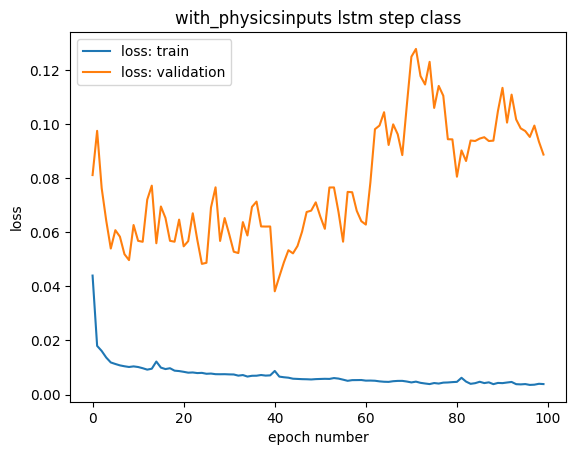

In [8]:
# Plot train/validation loss across epochs.

plot_title = (EXP_TYPE + ' lstm step class')
save_dir = os.path.join(BASE_DIR, 'reports', 'figures', EXP_TYPE + "_lstm_stepclass", 'training_loss.png')

plt.plot(fit_history.history['loss'], label='loss: train')
plt.plot(fit_history.history['val_loss'], label='loss: validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.title(plot_title)
plt.legend()
plt.savefig(save_dir)

plt.show()

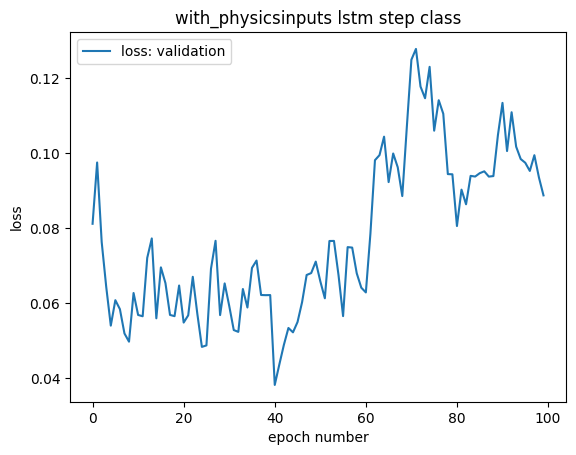

In [9]:
plt.plot(fit_history.history['val_loss'], label='loss: validation')
plot_title = (EXP_TYPE + ' lstm step class')
save_dir = os.path.join(BASE_DIR, 'reports', 'figures', EXP_TYPE + "_lstm_stepclass", 'training_loss_validationloss.png')

plt.ylabel('loss')
plt.xlabel('epoch number')
plt.title(plot_title)
plt.legend()
plt.savefig(save_dir)

plt.show()